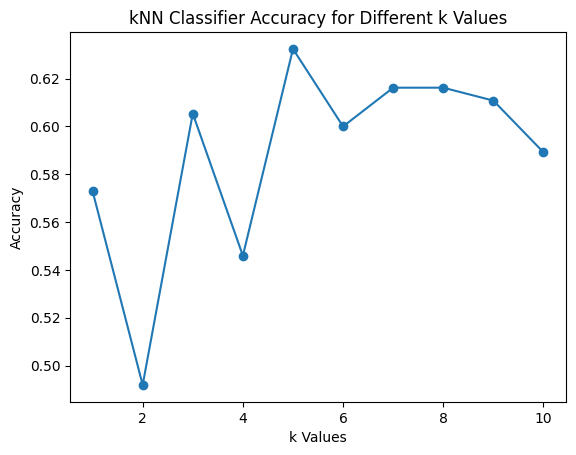

A1 - Centroid1: Loan_ID               307.907583
Gender                  0.841232
Married                 0.689573
Dependents              0.836493
Education               0.194313
Self_Employed           0.241706
ApplicantIncome      5384.068720
CoapplicantIncome    1504.516398
LoanAmount            144.349606
Loan_Amount_Term      341.090047
Credit_History          0.969577
Property_Area           1.054502
dtype: float64
A1 - Centroid2: Loan_ID               303.406250
Gender                  0.833333
Married                 0.588542
Dependents              0.854167
Education               0.270833
Self_Employed           0.229167
ApplicantIncome      5446.078125
CoapplicantIncome    1877.807292
LoanAmount            150.945488
Loan_Amount_Term      344.000000
Credit_History          0.562232
Property_Area           1.000000
dtype: float64
A1 - Spread1: Loan_ID               174.947896
Gender                  0.414096
Married                 0.477786
Dependents              1.105478


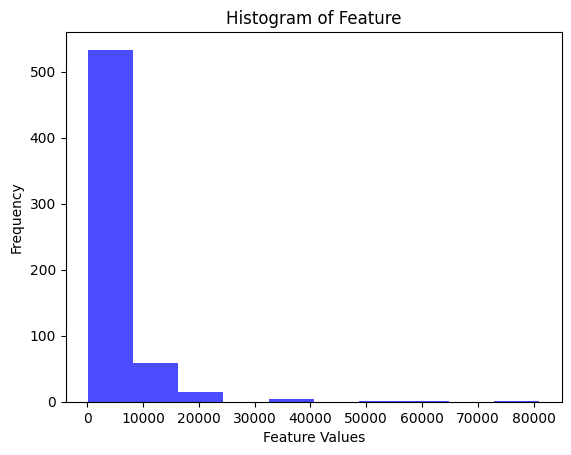

A3 - Minkowski distances: [2792.412162162162, 1969.050280646862, 1760.710784905493, 1667.9689481355758, 1616.8764224066026, 1585.3643477188493, 1564.54490490939, 1550.1502939340467, 1539.8770432516956, 1532.374118479464]


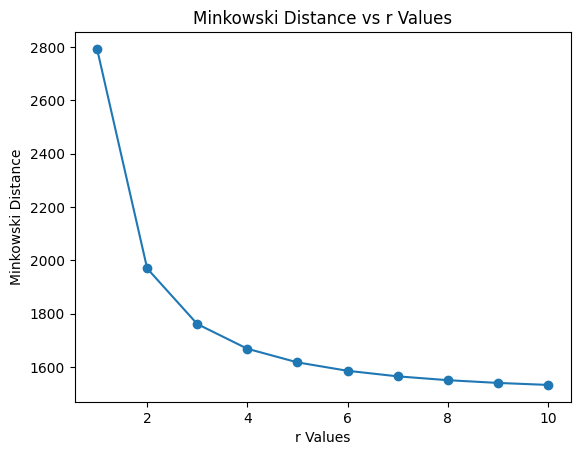

A4 - Train/Test split done
A5 - kNN Classifier trained (k=3)
A6 - Accuracy: 0.6054054054054054
A7 - Predicted classes: ['Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y'
 'N' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N'
 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y'
 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N'
 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y'
 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'N'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y'
 'Y' 'Y' 'N' 'Y' 'Y']
A8 - k values vs Accuracy plot
A9 - Confusion Matrix: [[  9  56]
 [ 17 103]]
A9 - Accuracy: 0.6054054054054054
A9 - Precision: 0.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

# This function to evaluate intraclass spread and interclass distances
def evaluate_class_distances(class1_data, class2_data):
    centroid1 = np.mean(class1_data, axis=0)#Calculates the cenetroid distances for the 1st class data
    centroid2 = np.mean(class2_data, axis=0)#Calculates the cenetroid distances for the 2nd class data

    spread1 = np.std(class1_data, axis=0)
    spread2 = np.std(class2_data, axis=0)

    distance_between_centroids = np.linalg.norm(centroid1 - centroid2)

    return centroid1, centroid2, spread1, spread2, distance_between_centroids

# This function plots the histogram for a selected feature in this case it is the ApplicantIncome
def plot_histogram(feature_data, bins=10):
    plt.hist(feature_data, bins=bins, color='blue', alpha=0.7)
    plt.xlabel('Feature Values')
    plt.ylabel('Frequency')
    plt.title('Histogram of Feature')
    plt.show()

# This function calculates the Minkowski distance for two feature vectors
def calculate_minkowski_distance(vec1, vec2, r_values):
    distances = [np.linalg.norm(vec1 - vec2, ord=r) for r in r_values]
    return distances

# This function splits the dataset into train and test sets, where the test data set size is 30% of the original data
def split_dataset(X, y, test_size=0.3):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    return X_train, X_test, y_train, y_test

# Function to train kNN classifier
def train_knn_classifier(X_train, y_train, k=3):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train)
    return neigh

# Function to test accuracy of kNN classifier
def test_knn_accuracy(classifier, X_test, y_test):
    accuracy = classifier.score(X_test, y_test)
    return accuracy

# Function to use predict() function to study prediction behavior
def predict_classes(classifier, X_test):
    predicted_classes = classifier.predict(X_test)
    return predicted_classes

# Function to vary k from 1 to 11 and make an accuracy plot
def compare_k_values(X_train, y_train, X_test, y_test, max_k=11):
    k_values = range(1, max_k)
    accuracies = []

    for k in k_values:
        classifier = train_knn_classifier(X_train, y_train, k)
        accuracy = test_knn_accuracy(classifier, X_test, y_test)
        accuracies.append(accuracy)

    plt.plot(k_values, accuracies, marker='o')
    plt.xlabel('k Values')
    plt.ylabel('Accuracy')
    plt.title('kNN Classifier Accuracy for Different k Values')
    plt.show()

# Function to evaluate confusion matrix and other performance metrics
def evaluate_performance_metrics(y_true, y_pred):
    confusion_mat = confusion_matrix(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='binary', pos_label='Y')
    recall = recall_score(y_true, y_pred, average='binary', pos_label='Y')
    f1 = f1_score(y_true, y_pred, average='binary', pos_label='Y')

    return confusion_mat, accuracy, precision, recall, f1

# Load the entire dataset from a CSV file
# Replace 'your_dataset.csv' with the actual file name
df = pd.read_csv('/content/loan-train.csv')

# Assume Loan_Status is the target variable
X = df.drop(columns=['Loan_Status'])  # Remove 'Loan_Status' from the features
y = df['Loan_Status']

# Encode categorical variables
label_encoder = LabelEncoder()
categorical_columns = X.select_dtypes(include=['object']).columns

for column in categorical_columns:
    X[column] = label_encoder.fit_transform(X[column])

# Replace missing values using SimpleImputer, we replaced with mean, but also can be replaced with 'median' or 'mode' as well
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)#Stores dataset after the data is pre prossesed


# Split dataset into train and test sets
X_train, X_test, y_train, y_test = split_dataset(X_imputed, y)

# Train kNN classifier
knn_classifier = train_knn_classifier(X_train, y_train, k=3)

# Test accuracy of kNN classifier
accuracy = test_knn_accuracy(knn_classifier, X_test, y_test)

# Predict classes for test set
predicted_classes = predict_classes(knn_classifier, X_test)

# Compare k values and make an accuracy plot
compare_k_values(X_train, y_train, X_test, y_test)

## Evaluate confusion matrix and other performance metrics
confusion_mat, accuracy, precision, recall, f1 = evaluate_performance_metrics(y_test, predicted_classes)

print("A1 - Centroid1:", centroid1)
print("A1 - Centroid2:", centroid2)
print("A1 - Spread1:", spread1)
print("A1 - Spread2:", spread2)
print("A1 - Distance between centroids:", distance_between_centroids)
print("A2 - Histogram plotted for 'ApplicantIncome'")
selected_feature_data = X_imputed['ApplicantIncome']
plot_histogram(selected_feature_data)
print("A3 - Minkowski distances:", minkowski_distances)
plt.plot(r_values, minkowski_distances, marker='o')
plt.xlabel('r Values')
plt.ylabel('Minkowski Distance')
plt.title('Minkowski Distance vs r Values')
plt.show()
print("A4 - Train/Test split done")
print("A5 - kNN Classifier trained (k=3)")
print("A6 - Accuracy:", accuracy)
print("A7 - Predicted classes:", predicted_classes)
print("A8 - k values vs Accuracy plot")
print("A9 - Confusion Matrix:", confusion_mat)
print("A9 - Accuracy:", accuracy)
print("A9 - Precision:", precision)
print("A9 - Recall:", recall)
print("A9 - F1 Score:", f1)


